When we build the machine learning models for the predictions of contineous or categorical feature, vary rarely we use all the features given to us. It is very crucial to select the features which are making maximum impact on our dependet feature to get the predictions right.

The goal of feature selection in machine learning is to find the best set of features that allows one to build useful models of studied phenomena.

The techniques for feature selection in machine learning can be broadly classified into the following categories:

Supervised Techniques: These techniques can be used for labeled data, and are used to identify the relevant features for increasing the efficiency of supervised models like classification and regression.

Unsupervised Techniques: These techniques can be used for unlabeled data.

From a taxonomic point of view, these techniques are classified as under:

##### A. Filter methods

##### B. Wrapper methods

##### C. Embedded methods

##### D. Hybrid methods

### Filter Method:
Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.


#### 1. Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

In [3]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


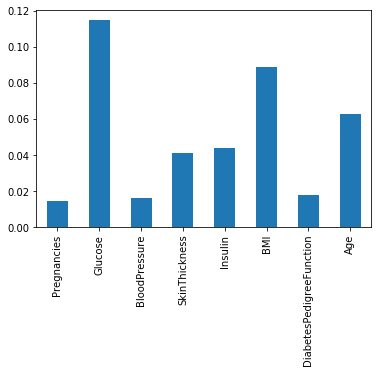

In [4]:
from sklearn.feature_selection import mutual_info_classif

# Define X & Y
X = data.drop('Outcome', axis=1)
Y = data['Outcome']


importance=mutual_info_classif(X, Y)
feature_importance=pd.Series(importance, data.columns[:-1])
feature_importance.plot(kind='bar')
plt.show()

In [5]:
feature_importance[feature_importance>0.04]

Glucose          0.114788
SkinThickness    0.041289
Insulin          0.043738
BMI              0.088616
Age              0.062731
dtype: float64

#### Chi-square Test:
The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features=SelectKBest(chi2, k=3)
X_kbest_features=chi2_features.fit_transform(X, Y)

print('Original Shape of features', X.shape[1])
print('Reduced Shape of features', X_kbest_features.shape[1])

Original Shape of features 8
Reduced Shape of features 3


#### Fisher’s Score:
Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

In [ ]:
from skfeature.function.similarity_based import fisher_score
rank=fisher_score.fisher_score(X, Y)

feat_importance=pd.Series(rank, data.columns[:-1])
feat_importance.plot(kind='barh')
plt.show()

#### Correlation Coefficient:
Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.



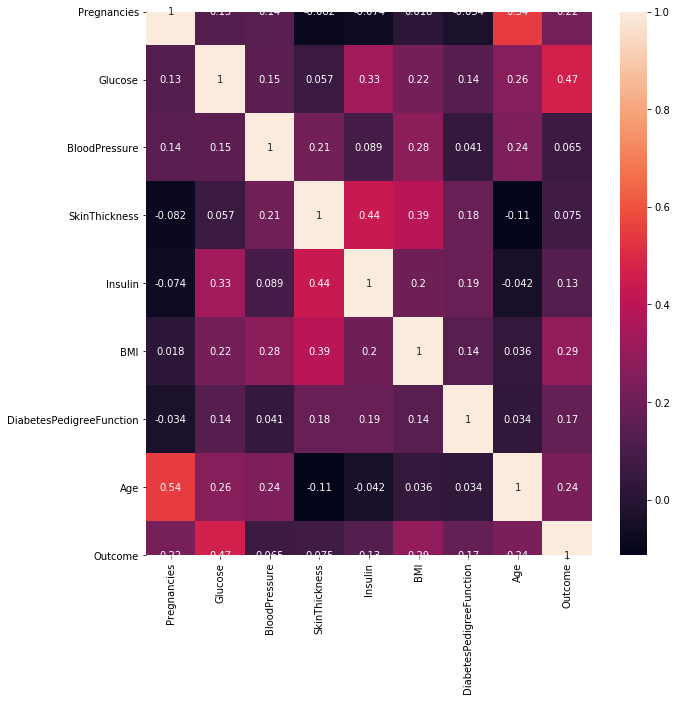

In [7]:
corr=data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

#### Variance Threshold:
The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.

In [8]:
from sklearn.feature_selection import VarianceThreshold

v_threshhold=VarianceThreshold(threshold=1)
v_threshhold.fit(X)
v_threshhold.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True])

#### Mean Absolute Difference (MAD):
‘The mean absolute difference (MAD) computes the absolute difference from the mean value. The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scale variant.’ [1] This means that higher the MAD, higher the discriminatory power.

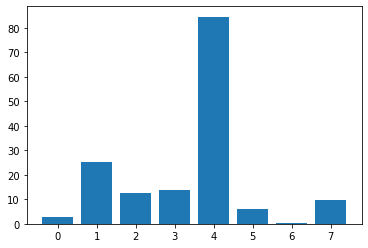

In [9]:
# calculate Mean Absolute Difference
mean_abs_diff=np.sum(np.abs(X - np.mean(X, axis=0)), axis=0)/X.shape[0]

#plot the values
plt.bar(np.arange(X.shape[1]), mean_abs_diff)
plt.show()

#### Dispersion ratio:
Another measure of dispersion applies the arithmetic mean (AM) and the geometric mean (GM).

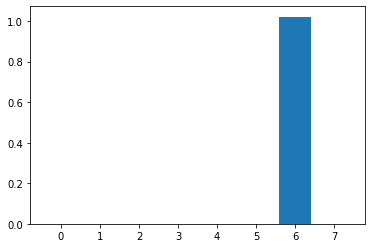

In [10]:
X=X+1
am=np.mean(X, axis=0)

gm=np.power(np.prod(X, axis=0), 1/X.shape[0])

disp_ratio=am/gm

plt.bar(np.arange(X.shape[1]), disp_ratio)
plt.show()

### B. Wrapper Methods:
Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.

#### Forward Feature Selection:
This is an iterative method wherein we start with the best performing variable against the target. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
LR=LogisticRegression()
ffs = SequentialFeatureSelector(LR, k_features='best', forward=True, n_jobs=1)
ffs.fit(X, Y)
features=list(ffs.k_feature_names_)
features=list(map(int, features))
LR.fit(X[features], Y)
Y_pred=LR.predict(X[features])

#### Backward Feature Elimination:
This method works exactly opposite to the Forward Feature Selection method. Here, we start with all the features available and build a model. Next, we the variable from the model which gives the best evaluation measure value. This process is continued until the preset criterion is achieved.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
LR=LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=0, n_jobs=1, max_iter=500)
LR.fit(X, Y)
BFS=SequentialFeatureSelector(LR, k_features='best', forward=False, n_jobs=1)
BFS.fit(X, Y)
Features=list(BFS.k_feature_names_)
features=list(map(int, features))
LR.fit(X[features], Y)
Y_pred=LR.predict(X[features])

#### Exhaustive Feature Selection:
This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

In [24]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

from sklearn.ensemble import RandomForestClassifier

EFS=ExhaustiveFeatureSelector(RandomForestClassifier(), min_features=4, max_features=8, scoring='roc_auc', cv=2)

EFS=EFS.fit(X, Y)

selected_features=X.columns[list(EFS.best_idx_)]
print(selected_features)

print(EFS.best_score_)

Features: 163/163

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
0.8309925373134328


#### Recursive Feature Elimination:
‘Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.

Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.’[2]

In [ ]:
from sklearn.feature_selection import RFE
RFE=RFE(LR, n_features_to_select=7)
RFE.fit(X, Y)
y_pred=RFE.predict(X)

### C. Embedded Methods:
These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.


#### LASSO Regularization (L1):
Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularization, Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [ ]:
from sklearn.feature_selection import SelectFromModel

logistic=LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=7).fit(X, Y)

model=SelectFromModel(logistic, prefit=True)

X_new=model.transform(X)

select_columns=selected_features.columns[selected_features.var() != 0]
select_columns

#### Random Forest Importance:
Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=340)

model.fit(X, Y)

importance=model.feature_importances_

final_df=pd.DataFrame('Features':X.columns, 'Importance':importance)

final_df=final_df.sort_values('Importance')

final_df.plot.bar(color='teal')
plt.show()